# Integrated Project

**Project description**

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Data Preparation
**Initial Observations:**
- There are many missing critic and user scores, figure out what to do with them 
- Many missing ratings as well 
- Some missing years, can change data type though it's not essential

Features: 
- Create a total sales column
- Create an average user / critic score column
- Create separate grouped tables (by console, genre, rating) and aggregate there

Analysis: 
- Examine impact on sales from possible factors: platform, genre, scores, rating
- Examine regional differences (are some games a hit in specific regions?) 
- Determine the factors that impact sales 

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Import the data
df = pd.read_csv('moved_games.csv')

In [3]:
# Changes:
#     lower-case columns
#     change user_score to float 
#     change year to datetime 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales   
count     16446.000000  16715.000000  16715.000000  16715.000000  \
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [5]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales   
0                Wii Sports      Wii           2006.0        Sports     41.36  \
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [6]:
# Changing columns to lower-case 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Looks like there's a 'tbd' rating
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# No discernable pattern for tbds, will convert to nan
#     Only in games released after 1997 in this dataset, but as discovered later on most pre-1998 games don't have ratings 
#     Tend to be less successful games
df.query('user_score == "tbd"').describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales   
count      2376.000000  2424.000000  2424.000000  2424.000000  2424.000000  \
mean       2007.450337     0.126052     0.043519     0.002727     0.015862   
std           3.484229     0.180586     0.111412     0.026136     0.039156   
min        1997.000000     0.000000     0.000000     0.000000     0.000000   
25%        2005.000000     0.030000     0.000000     0.000000     0.000000   
50%        2008.000000     0.075000     0.010000     0.000000     0.010000   
75%        2010.000000     0.150000     0.040000     0.000000     0.020000   
max        2016.000000     3.450000     2.590000     0.860000     1.090000   

       critic_score  
count   1082.000000  
mean      60.711645  
std       11.193035  
min       23.000000  
25%       54.000000  
50%       62.000000  
75%       69.000000  
max       90.000000

In [9]:
# Checking what tbd looks like 
df.query('user_score == "tbd"').sort_values(by='na_sales', ascending=False).head()

name platform  year_of_release   
119                              Zumba Fitness      Wii           2010.0  \
657   Frogger's Adventures: Temple of the Frog      GBA              NaN   
301             Namco Museum: 50th Anniversary      PS2           2005.0   
881              Who wants to be a millionaire       PC           1999.0   
645                               uDraw Studio      Wii           2010.0   
718                            Just Dance Kids      Wii           2010.0   
520                            Zumba Fitness 2      Wii           2011.0   
1151         SpongeBob's Atlantis SquarePantis       DS           2007.0   
1070                              Game Party 3      Wii           2009.0   
1047                             Tetris Worlds      GBA           2001.0   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score   
119      Sports      3.45      2.59       0.0         0.66           NaN  \
657   Adventure      2.15      0.18       0.0         0.07          73.0   
301        Misc      2.08      1.35       0.0         0.54          61.0   
881        Misc      1.94      0.00       0.0         0.00           NaN   
645        Misc      1.65      0.57       0.0         0.20          71.0   
718        Misc      1.52      0.54       0.0         0.18           NaN   
520      Sports      1.51      1.03       0.0         0.27           NaN   
1151     Action      1.49      0.00       0.0         0.11          64.0   
1070     Puzzle      1.40      0.16       0.0         0.12          37.0   
1047     Puzzle      1.25      0.39       0.0         0.06          65.0   

     user_score rating  
119         tbd      E  
657         tbd      E  
301         tbd   E10+  
881         tbd      E  
645         tbd      E  
718         tbd      E  
520         tbd      T  
1151        tbd      E  
1070        tbd      E  
1047        tbd      E

In [10]:
# Why are some year_of_release empty?
#     Some names have a year in the name, usually released prior to that year or in that year 
#     But out of 16,000+ games, only 269 are missing a year. Will keep it NaN for now 
#     Originally tried to fill it in with years in the name but realized there are games like Warzone2100, Battlefield 1942 that don't fit 

df.query('year_of_release.isna()').sort_values(by='na_sales', ascending=False).head()

name platform  year_of_release   
183                           Madden NFL 2004      PS2              NaN  \
609                            Space Invaders     2600              NaN   
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   
627                                 Rock Band     X360              NaN   
456                LEGO Batman: The Videogame      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score   
183     Sports      4.26      0.26      0.01         0.71          94.0  \
609    Shooter      2.36      0.14      0.00         0.03           NaN   
657  Adventure      2.15      0.18      0.00         0.07          73.0   
627       Misc      1.93      0.33      0.00         0.21          92.0   
456     Action      1.80      0.97      0.00         0.29          74.0   

    user_score rating  
183        8.5      E  
609        NaN    NaN  
657        tbd      E  
627        8.2      T  
456        7.9   E10+

In [11]:
df.query('year_of_release.isna()').describe()

year_of_release    na_sales    eu_sales    jp_sales  other_sales   
count              0.0  269.000000  269.000000  269.000000   269.000000  \
mean               NaN    0.219888    0.090929    0.024907     0.032007   
std                NaN    0.424907    0.207933    0.090160     0.075546   
min                NaN    0.000000    0.000000    0.000000     0.000000   
25%                NaN    0.010000    0.000000    0.000000     0.000000   
50%                NaN    0.090000    0.020000    0.000000     0.010000   
75%                NaN    0.240000    0.100000    0.000000     0.030000   
max                NaN    4.260000    2.360000    0.770000     0.710000   

       critic_score  
count    154.000000  
mean      67.584416  
std       14.828740  
min       22.000000  
25%       57.000000  
50%       70.000000  
75%       78.000000  
max       94.000000

**Changing column data types here**

In [12]:
# Change user_score to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# sorted(df['user_score'].unique())

In [13]:
# Change year_of_release to YYYY
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

**Changing individual values here**

In [14]:
# See Data Cleaning section below for details
#     Strongest Tokyo University Shogi DS date is wrong. Original on MYCOM? Was 1986, 
#     DS version is 2007? https://www.suruga-ya.com/en/product/176000588

df.loc[15957,'year_of_release'] = 2007

In [15]:
# Removing Wii sports since it comes bundled with the Wii and is an extreme outlier 

df = df.drop(df.query('name == "Wii Sports"').index)

**Creating new columns here**

In [16]:
# Create a total_sales column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

In [17]:
# Get user_score on the same scale as critic_score
# Create a combined score

df['user_score'] = df['user_score'] * 10
df['avg_score'] = (df['user_score'] + df['critic_score'])/2

In [99]:
# Turn ratings into numeric 

# E: Everyone, suitable for all ages --> 3
# M: Mature, intended for ages 17 and up --> 18
# T: Teen, suitable for ages 13 and up --> 13
# E10+: Everyone 10+, suitable for ages 10 and up --> 10
# K-A: Kids to Adults, suitable for all ages (renamed to E for Everyone in 1998) --> Group with E
# AO: Adults Only, intended for ages 18 and up --> Group with M
# EC: Early Childhood, suitable for ages 3 and up --> Group with E
# RP: Rating Pending, not yet assigned a final rating by the ESRB

df['rating'].unique()

array([nan, 'E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [102]:
rating_dict = {
    'E':3, 
    'M':18, 
    'T':13, 
    'E10+':10, 
    'K-A':3, 
    'AO':18, 
    'EC':3
}

df['age_rating'] = np.nan
df['age_rating'] = df['rating'].map(rating_dict)
df['age_rating'].astype('float')

1        NaN
2        3.0
3        3.0
4        NaN
5        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: age_rating, Length: 16714, dtype: float64

**Create masks, groups, and subset dataframes here**

In [19]:
# Create a table with:
#     Console
#     Min year with game released
#     Max year with game released
#     Total sales
#     Total games 

# Observations:
#     Looks like there's an error with DS (it was not released in 1985)
#     Should take PC out of any average calcualtions, since it's different than a platform console 
#     Also take out any console with max at 2016 since those are "present" at the time of this data 

years = df.groupby('platform')['year_of_release'].agg(['min','max','count'])
sales = df.groupby('platform')['total_sales'].sum()
table = pd.concat([years, sales], axis=1)
table['avg_sales'] = table['total_sales'] / table['count']
table['lifecycle'] = table['max'] - table['min']
table = table.sort_values(by=['total_sales'], ascending=False).reset_index()
table.head()

platform     min     max  count  total_sales  avg_sales  lifecycle
0      PS2  2000.0  2011.0   2127      1062.33   0.499450       11.0
1     X360  2005.0  2016.0   1232       885.66   0.718880       11.0
2      PS3  2006.0  2016.0   1306       803.97   0.615597       10.0
3      Wii  2006.0  2016.0   1285       754.35   0.587043       10.0
4       DS  2004.0  2013.0   2121       746.86   0.352126        9.0

In [68]:
top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'] 
top_df = df.query('platform in @top_platforms')

In [69]:
mid_platforms = ['GBA', 'PSP', 'XB', 'GB', 'NES', '3DS', 'N64', 'SNES', 'GC', 'XOne'] 
mid_df = df.query('platform in @mid_platforms')

In [70]:
post_2000 = table[table['min'] >= 2000]['platform'].tolist()
post_2000_df = df.query('platform in @post_2000')

In [71]:
old_platforms = table[table['max'] < 2016]['platform'].tolist()
old_df = df.query('platform in @old_platforms')

In [72]:
new_platforms = table[table['max'] >= 2016]['platform'].tolist()
new_df = df.query('platform in @new_platforms')

In [73]:
above_10m = df.query('total_sales > 10')

## Data Cleaning

In [24]:
# Strongest Tokyo University Shogi DS date is wrong. Original on MYCOM? Was 1986, 
# DS version is 2007? https://www.suruga-ya.com/en/product/176000588
# Change value above so that it's reflected in all the tables

df.query('platform == "DS"').sort_values(by=['year_of_release']).head()

name platform   
691                                WarioWare Touched!       DS  \
13463                               Cocoto Kart Racer       DS   
11517                           Kenshuui Tendo Dokuta       DS   
4421   The Urbz: Sims in the City (all regions sales)       DS   
7902                          Daigasso! Band Brothers       DS   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales   
691             2004.0      Puzzle      0.51      0.45      1.21         0.13  \
13463           2004.0      Racing      0.04      0.00      0.00         0.00   
11517           2004.0  Simulation      0.00      0.00      0.08         0.00   
4421            2004.0  Simulation      0.40      0.01      0.02         0.00   
7902            2004.0        Misc      0.00      0.00      0.19         0.00   

       critic_score  user_score rating  total_sales  avg_score  
691             NaN         NaN    NaN         2.17        NaN  
13463           NaN         NaN      E         0.04        NaN  
11517           NaN         NaN    NaN         0.08        NaN  
4421            NaN         NaN    NaN         0.43        NaN  
7902            NaN         NaN    NaN         0.19        NaN

**Exploring NaN user_score and critic_score**

In [25]:
# Exploring NaN user_score and critic_score
# Looks like the nulls generally overlap for user and critic score 

df.query('critic_score.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Index: 8578 entries, 1 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8576 non-null   object 
 1   platform         8578 non-null   object 
 2   year_of_release  8463 non-null   float64
 3   genre            8576 non-null   object 
 4   na_sales         8578 non-null   float64
 5   eu_sales         8578 non-null   float64
 6   jp_sales         8578 non-null   float64
 7   other_sales      8578 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       573 non-null    float64
 10  rating           1895 non-null   object 
 11  total_sales      8578 non-null   float64
 12  avg_score        0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 938.2+ KB


In [26]:
df.query('user_score.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Index: 9125 entries, 1 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9123 non-null   object 
 1   platform         9125 non-null   object 
 2   year_of_release  8983 non-null   float64
 3   genre            9123 non-null   object 
 4   na_sales         9125 non-null   float64
 5   eu_sales         9125 non-null   float64
 6   jp_sales         9125 non-null   float64
 7   other_sales      9125 non-null   float64
 8   critic_score     1120 non-null   float64
 9   user_score       0 non-null      float64
 10  rating           2445 non-null   object 
 11  total_sales      9125 non-null   float64
 12  avg_score        0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 998.0+ KB


In [27]:
df.query('critic_score.isna()').describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales   
count      8463.000000  8578.000000  8578.000000  8578.000000  8578.000000  \
mean       2005.819213     0.178381     0.085059     0.099045     0.023539   
std           7.042594     0.716068     0.321036     0.343936     0.088740   
min        1980.000000     0.000000     0.000000     0.000000     0.000000   
25%        2001.000000     0.000000     0.000000     0.000000     0.000000   
50%        2008.000000     0.020000     0.000000     0.000000     0.000000   
75%        2011.000000     0.140000     0.050000     0.060000     0.020000   
max        2016.000000    29.080000    10.950000    10.220000     2.740000   

       critic_score  user_score  total_sales  avg_score  
count           0.0  573.000000  8578.000000        0.0  
mean            NaN   64.223386     0.362485        NaN  
std             NaN   19.593215     1.168347        NaN  
min             NaN    0.000000     0.000000        NaN  
25%             NaN   53.000000     0.040000        NaN  
50%             NaN   70.000000     0.110000        NaN  
75%             NaN   79.000000     0.300000        NaN  
max             NaN   97.000000    39.470000        NaN

In [28]:
df.query('user_score.isna()').describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales   
count      8983.000000  9125.000000  9125.000000  9125.000000  9125.000000  \
mean       2005.488256     0.169853     0.078655     0.093026     0.020686   
std           6.757205     0.692992     0.306731     0.334346     0.081948   
min        1980.000000     0.000000     0.000000     0.000000     0.000000   
25%        2001.000000     0.000000     0.000000     0.000000     0.000000   
50%        2007.000000     0.030000     0.000000     0.000000     0.000000   
75%        2010.000000     0.130000     0.050000     0.060000     0.010000   
max        2016.000000    29.080000    10.950000    10.220000     2.740000   

       critic_score  user_score  total_sales  avg_score  
count   1120.000000         0.0  9125.000000        0.0  
mean      60.934821         NaN     0.341534        NaN  
std       11.383565         NaN     1.131553        NaN  
min       23.000000         NaN     0.000000        NaN  
25%       54.000000         NaN     0.040000        NaN  
50%       62.000000         NaN     0.100000        NaN  
75%       69.000000         NaN     0.270000        NaN  
max       90.000000         NaN    39.470000        NaN

In [29]:
df.query('user_score.isna() or critic_score.isna()').sort_values(by='total_sales', ascending=False).head(60)

name platform  year_of_release   
1                            Super Mario Bros.      NES           1985.0  \
4                     Pokemon Red/Pokemon Blue       GB           1996.0   
5                                       Tetris       GB           1989.0   
9                                    Duck Hunt      NES           1984.0   
12                 Pokemon Gold/Pokemon Silver       GB           1999.0   
10                                  Nintendogs       DS           2005.0   
18                           Super Mario World     SNES           1990.0   
21                            Super Mario Land       GB           1989.0   
20               Pokemon Diamond/Pokemon Pearl       DS           2006.0   
22                         Super Mario Bros. 3      NES           1988.0   
25               Pokemon Ruby/Pokemon Sapphire      GBA           2002.0   
27                 Pokemon Black/Pokemon White       DS           2010.0   
30     Pokémon Yellow: Special Pikachu Edition       GB           1998.0   
33                         Pokemon X/Pokemon Y      3DS           2013.0   
31                   Call of Duty: Black Ops 3      PS4           2015.0   
45                              Super Mario 64      N64           1996.0   
46        Pokemon HeartGold/Pokemon SoulSilver       DS           2009.0   
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS           2014.0   
50          Super Mario Land 2: 6 Golden Coins       GB           1992.0   
56                       Super Mario All-Stars     SNES           1993.0   
58           Pokemon FireRed/Pokemon LeafGreen      GBA           2004.0   
63                               Mario Kart 64      N64           1996.0   
59                              Super Mario 64       DS           2004.0   
71                         Donkey Kong Country     SNES           1994.0   
76                            Super Mario Kart     SNES           1992.0   
72                                   Minecraft     X360           2013.0   
82                               GoldenEye 007      N64           1997.0   
89                                     Pac-Man     2600           1982.0   
83             Pokemon Black 2/Pokemon White 2       DS           2012.0   
93        The Legend of Zelda: Ocarina of Time      N64           1998.0   
98                         Super Mario Bros. 2      NES           1988.0   
95      Crash Bandicoot 2: Cortex Strikes Back       PS           1997.0   
86          Mario & Sonic at the Olympic Games      Wii           2007.0   
96         Super Smash Bros. for Wii U and 3DS      3DS           2014.0   
112                  Mario Kart: Double Dash!!       GC           2003.0   
99                   Call of Duty: Black Ops 3     XOne           2015.0   
87                Star Wars Battlefront (2015)      PS4           2015.0   
108                           Pokemon Sun/Moon      3DS           2016.0   
115                            Crash Bandicoot       PS           1996.0   
124                        The Legend of Zelda      NES           1986.0   
137       Street Fighter II: The World Warrior     SNES           1992.0   
119                              Zumba Fitness      Wii           2010.0   
145                       Sonic the Hedgehog 2      GEN           1992.0   
158                          Super Smash Bros.      N64           1999.0   
157                                     Tetris      NES           1988.0   
133                    Pokémon Crystal Version       GB           2000.0   
168                            Pokemon Stadium      N64           1999.0   
167                          Super Mario World      GBA           2001.0   
122                                    FIFA 12      PS3           2011.0   
178                             Donkey Kong 64      N64           1999.0   
174                            Pokemon Pinball       GB           1999.0   
172                                  Dr. Mario       GB           1989.0   
191  Donkey Ko

In [30]:
# Certain consoles, mostly older and less popular (pre-1998 with the exception of PS1) have no reviews at all 
# Most of these are taken out in our slimmed down data set (post-2000 + top + mid games)

reviews = df.groupby('platform')[['critic_score','user_score']].count()
count = df.groupby('platform')['name'].count()
release = df.groupby('platform')['year_of_release'].min()

pd.concat([reviews, count, release], axis=1).sort_values(by='critic_score')

critic_score  user_score  name  year_of_release
platform                                                 
2600                 0           0   133           1980.0
SCD                  0           0     6           1993.0
PCFX                 0           0     1           1996.0
SNES                 0           0   239           1990.0
NG                   0           0    12           1993.0
NES                  0           0    98           1983.0
N64                  0           0   319           1996.0
GG                   0           0     1           1992.0
GEN                  0           0    27           1990.0
TG16                 0           0     2           1995.0
WS                   0           0     6           1999.0
GB                   0           0    98           1988.0
3DO                  0           0     3           1994.0
SAT                  0           0   173           1994.0
DC                  14          14    52           1998.0
WiiU                90         100   147           2012.0
PSV                120         143   430           2011.0
3DS                168         174   520           2011.0
XOne               169         182   247           2013.0
PS                 200         162  1197           1994.0
PS4                252         257   392           2013.0
GBA                438         255   822           2000.0
GC                 448         366   556           2001.0
PSP                462         421  1209           2004.0
Wii                584         559  1319           2006.0
PC                 715         770   974           1985.0
DS                 717         516  2151           2004.0
XB                 725         586   824           2000.0
PS3                820         877  1331           2006.0
X360               916         966  1262           2005.0
PS2               1298        1241  2161           2000.0

<Axes: >

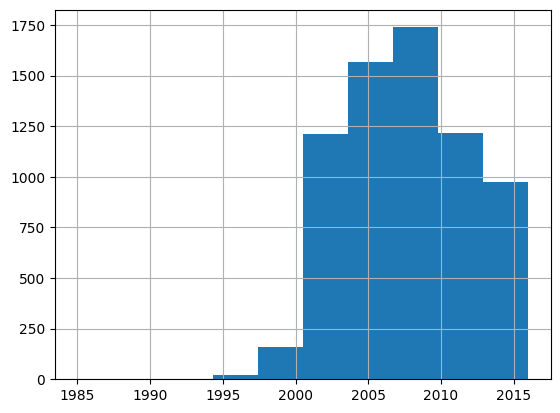

In [31]:
df.query('user_score.notna() and critic_score.notna()')['year_of_release'].hist()

<Axes: >

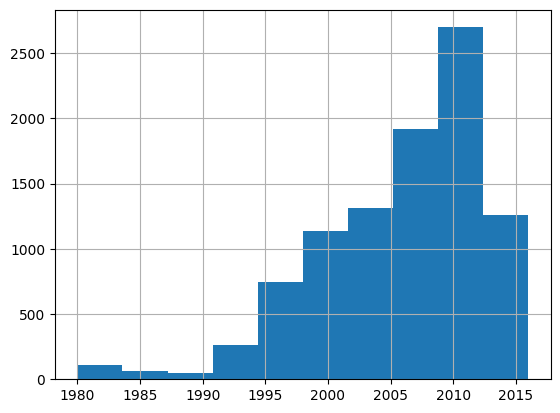

In [32]:
df.query('user_score.isna() or critic_score.isna()')['year_of_release'].hist()

In [33]:
cut_data = df.query('platform in @post_2000 and (platform in @top_platforms or platform in @mid_platforms)')

reviews = cut_data.groupby('platform')[['critic_score','user_score']].count()
count = cut_data.groupby('platform')['name'].count()
release = cut_data.groupby('platform')['year_of_release'].min()

pd.concat([reviews, count, release], axis=1).sort_values(by='critic_score')

critic_score  user_score  name  year_of_release
platform                                                 
3DS                168         174   520           2011.0
XOne               169         182   247           2013.0
GBA                438         255   822           2000.0
GC                 448         366   556           2001.0
PSP                462         421  1209           2004.0
Wii                584         559  1319           2006.0
DS                 717         516  2151           2004.0
XB                 725         586   824           2000.0
PS3                820         877  1331           2006.0
X360               916         966  1262           2005.0
PS2               1298        1241  2161           2000.0

In [34]:
cut_data_missing_scores = df.query('platform in @post_2000 and (platform in @top_platforms or platform in @mid_platforms) and (critic_score.isna() or user_score.isna())')
cut_data_missing_scores.sort_values(by='total_sales', ascending=False).head(20)

name platform  year_of_release   
10                                  Nintendogs       DS           2005.0  \
20               Pokemon Diamond/Pokemon Pearl       DS           2006.0   
25               Pokemon Ruby/Pokemon Sapphire      GBA           2002.0   
27                 Pokemon Black/Pokemon White       DS           2010.0   
33                         Pokemon X/Pokemon Y      3DS           2013.0   
46        Pokemon HeartGold/Pokemon SoulSilver       DS           2009.0   
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS           2014.0   
58           Pokemon FireRed/Pokemon LeafGreen      GBA           2004.0   
59                              Super Mario 64       DS           2004.0   
72                                   Minecraft     X360           2013.0   
83             Pokemon Black 2/Pokemon White 2       DS           2012.0   
86          Mario & Sonic at the Olympic Games      Wii           2007.0   
96         Super Smash Bros. for Wii U and 3DS      3DS           2014.0   
112                  Mario Kart: Double Dash!!       GC           2003.0   
99                   Call of Duty: Black Ops 3     XOne           2015.0   
108                           Pokemon Sun/Moon      3DS           2016.0   
119                              Zumba Fitness      Wii           2010.0   
167                          Super Mario World      GBA           2001.0   
122                                    FIFA 12      PS3           2011.0   
187                        Super Mario Bros. 3      GBA           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score   
10     Simulation      9.05     10.95      1.93         2.74           NaN  \
20   Role-Playing      6.38      4.46      6.04         1.36           NaN   
25   Role-Playing      6.06      3.90      5.38         0.50           NaN   
27   Role-Playing      5.51      3.17      5.65         0.80           NaN   
33   Role-Playing      5.28      4.19      4.35         0.78           NaN   
46         Action      4.34      2.71      3.96         0.76           NaN   
47   Role-Playing      4.35      3.49      3.10         0.74           NaN   
58   Role-Playing      4.34      2.65      3.15         0.35           NaN   
59       Platform      5.01      3.07      1.25         0.97           NaN   
72           Misc      5.70      2.65      0.02         0.81           NaN   
83   Role-Playing      2.79      1.72      3.14         0.41           NaN   
86         Sports      2.57      3.86      0.66         0.91           NaN   
96       Fighting      3.27      1.37      2.43         0.48           NaN   
112        Racing      4.12      1.77      0.87         0.19           NaN   
99        Shooter      4.59      2.11      0.01         0.68           NaN   
108  Role-Playing      2.98      1.45      2.26         0.45           NaN   
119        Sports      3.45      2.59      0.00         0.66           NaN   
167      Platform      3.21      1.11      0.95         0.20           NaN   
122        Sports      0.84      4.30      0.11         1.39           NaN   
187      Platform      2.93      1.25      0.83         0.20           NaN   

     user_score rating  total_sales  avg_score  
10          NaN    NaN        21.93        NaN  
20          NaN    NaN        16.88        NaN  
25          NaN    NaN        15.34        NaN  
27          NaN    NaN        14.33        NaN  
33          NaN    NaN        13.82        NaN  
46          NaN    NaN        11.01        NaN  
47          NaN    NaN        10.94        NaN  
58          NaN    NaN        10.14        NaN  
59          NaN    NaN         9.33        NaN  
72          NaN    NaN         8.37        NaN  
83          NaN    NaN         7.65        NaN  
86          NaN    NaN         7.09        NaN  
96          NaN    NaN         7.07        NaN  
112         NaN    NaN         6.76        NaN  
99          NaN    NaN         6.71        NaN  
108         NaN    NaN

In [35]:
# Possible fill in with average of console and genre. Let's see how it looks in EDA first




## EDA
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. 
    - Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
    - Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
    - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
    - Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
    - Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

**Check individual games here**

In [36]:
df.dropna(subset=['name']).query('name.str.contains("Battlefield")')

name platform   
101                                     Battlefield 3     X360  \
104                                     Battlefield 3      PS3   
289                                     Battlefield 1      PS4   
357                                     Battlefield 4      PS4   
378                                     Battlefield 4      PS3   
380                                     Battlefield 4     X360   
381                        Battlefield: Bad Company 2     X360   
485                        Battlefield: Bad Company 2      PS3   
538                                     Battlefield 3       PC   
709                                     Battlefield 1     XOne   
790                             Battlefield: Hardline      PS4   
847                                     Battlefield 4     XOne   
1311                         Battlefield: Bad Company     X360   
1437                                    Battlefield 4       PC   
1464                         Battlefield: Bad Company      PS3   
1666                            Battlefield: Hardline     XOne   
2859                       Battlefield: Bad Company 2       PC   
3575                     Battlefield 2: Modern Combat       XB   
4400                     Battlefield 2: Modern Combat      PS2   
4681                            Battlefield: Hardline      PS3   
4746                     Battlefield 2: Modern Combat     X360   
5000                                    Battlefield 1       PC   
6094                            Battlefield: Hardline     X360   
6853   Mobile Suit Gundam Battlefield Record U.C.0081      PS3   
9237                            Battlefield: Hardline       PC   
11445                                   Battlefield 2       PC   
14691           Battlefield 1942: The WW II Anthology       PC   
14830                             Battlefield Vietnam       PC   
14917                                Battlefield 2142       PC   
14958                                Battlefield 1942       PC   
15015          Battlefield 2: Modern Combat(JP sales)      PS2   

       year_of_release    genre  na_sales  eu_sales  jp_sales  other_sales   
101             2011.0  Shooter      4.46      2.11      0.06         0.69  \
104             2011.0  Shooter      2.85      2.89      0.35         1.08   
289             2016.0  Shooter      1.10      2.15      0.21         0.61   
357             2013.0  Shooter      1.35      1.55      0.17         0.51   
378             2013.0  Shooter      1.30      1.42      0.27         0.50   
380             2013.0  Shooter      2.15      1.01      0.02         0.31   
381             2010.0  Shooter      2.10      1.01      0.04         0.32   
485             2010.0  Shooter      1.33      1.10      0.08         0.44   
538             2011.0  Shooter      0.89      1.43      0.00         0.46   
709             2016.0  Shooter      1.28      0.77      0.00         0.20   
790             2015.0  Shooter      0.71      0.94      0.14         0.32   
847             2013.0  Shooter      1.25      0.58      0.00         0.19   
1311            2008.0  Shooter      0.81      0.46      0.04         0.15   
1437            2013.0  Shooter      0.39      0.87      0.00         0.10   
1464            2008.0  Shooter      0.76      0.35      0.05         0.18   
1666            2015.0  Shooter      0.72      0.37      0.01         0.11   
2859            2010.0  Shooter      0.19      0.53      0.00         0.00   
3575            2005.0  Shooter      0.39      0.15      0.00         0.02   
4400            2005.0  Shooter      0.37      0.01      0.00         0.06   
4681            2015.0  Shooter      0.13      0.15      0.07         0.06   
4746            2006.0  Shooter      0.35      0.02      0.01         0.03   
5000            2016.0  Shooter      0.11      0.24      0.00         0.03   
6094            2015.0  Shooter      0.17      0.09      0.00         0.03   
6853            2009.0   Action      0.00      0.00      0.24   

**Analyzing all-time sales trends**

<Axes: xlabel='platform'>

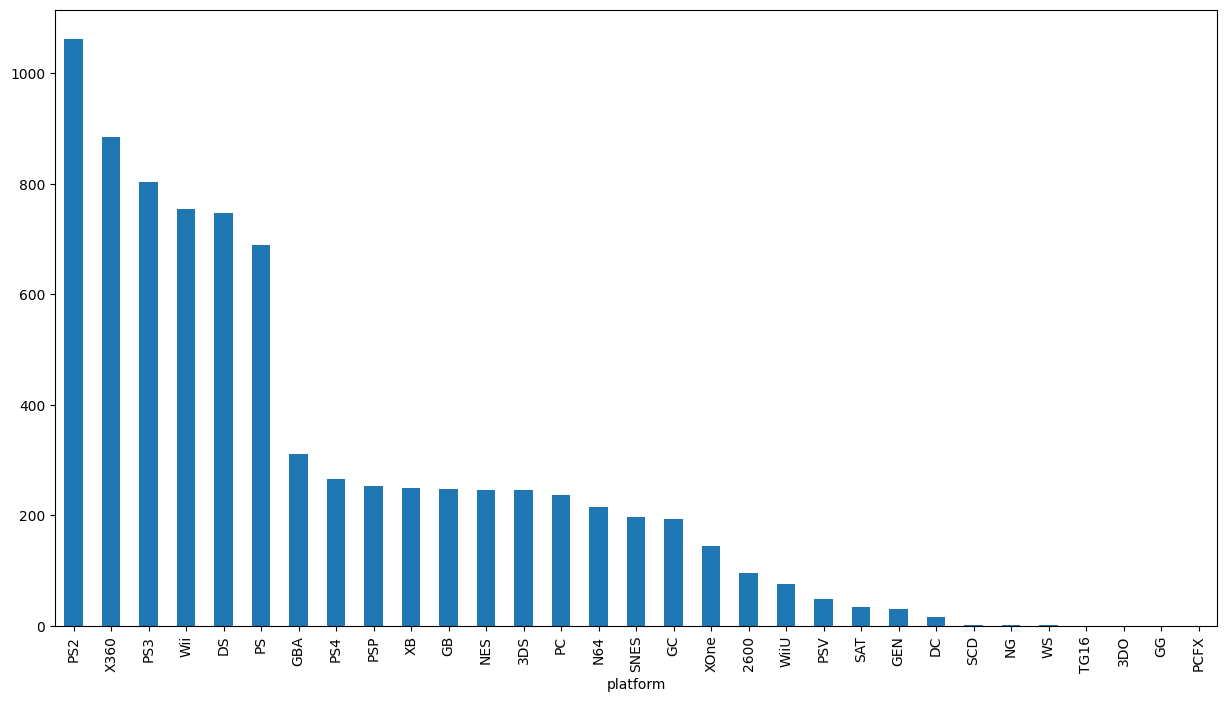

In [37]:
# All-time number of games released
# Segmenting consoles: 
#     These platforms have way more sales: PS2, X360, Wii, PS3, DS, PS
#     Middle tier consoles: GBA, PSP, XB, GB, NES, 3DS, N64, SNES, GC, XOne (excl PS4 because it was recently launched, and PC)

total_sales_table = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_table.plot(kind='bar', figsize=[15,8])

<Axes: xlabel='year_of_release'>

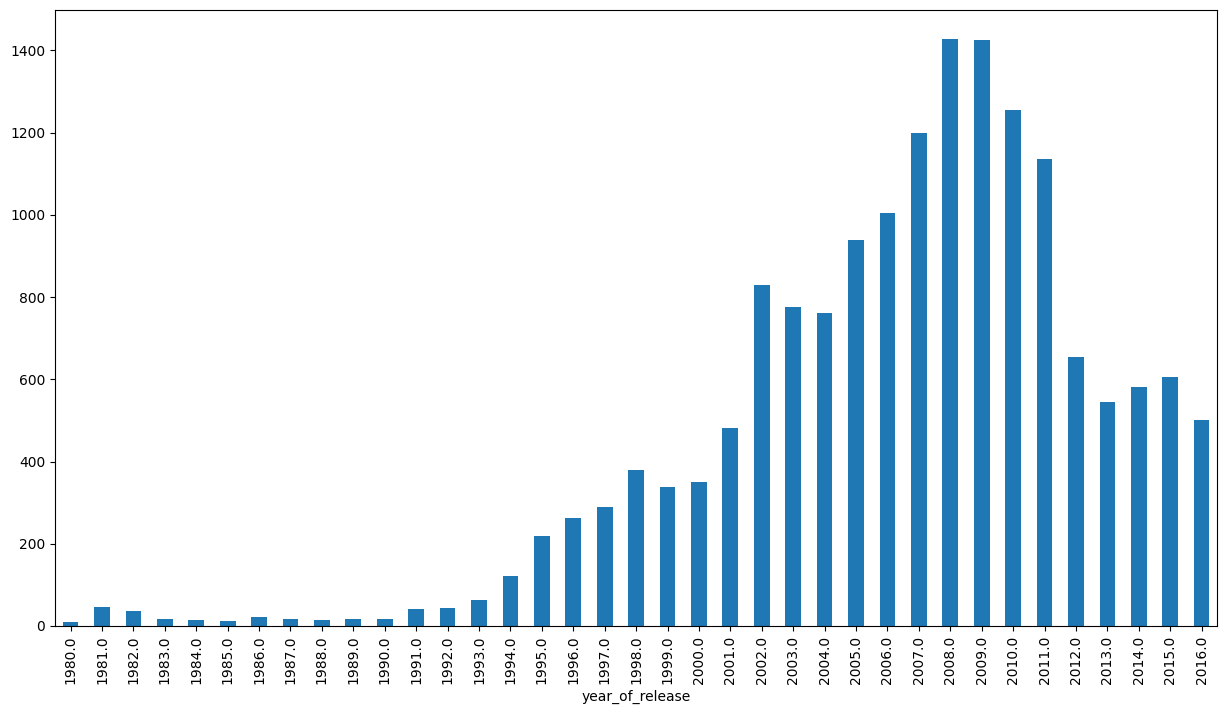

In [38]:
# Video games took off in the 90's, 2000-2010 had the largest issuance, which declined in the 10's

df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=[15,8])

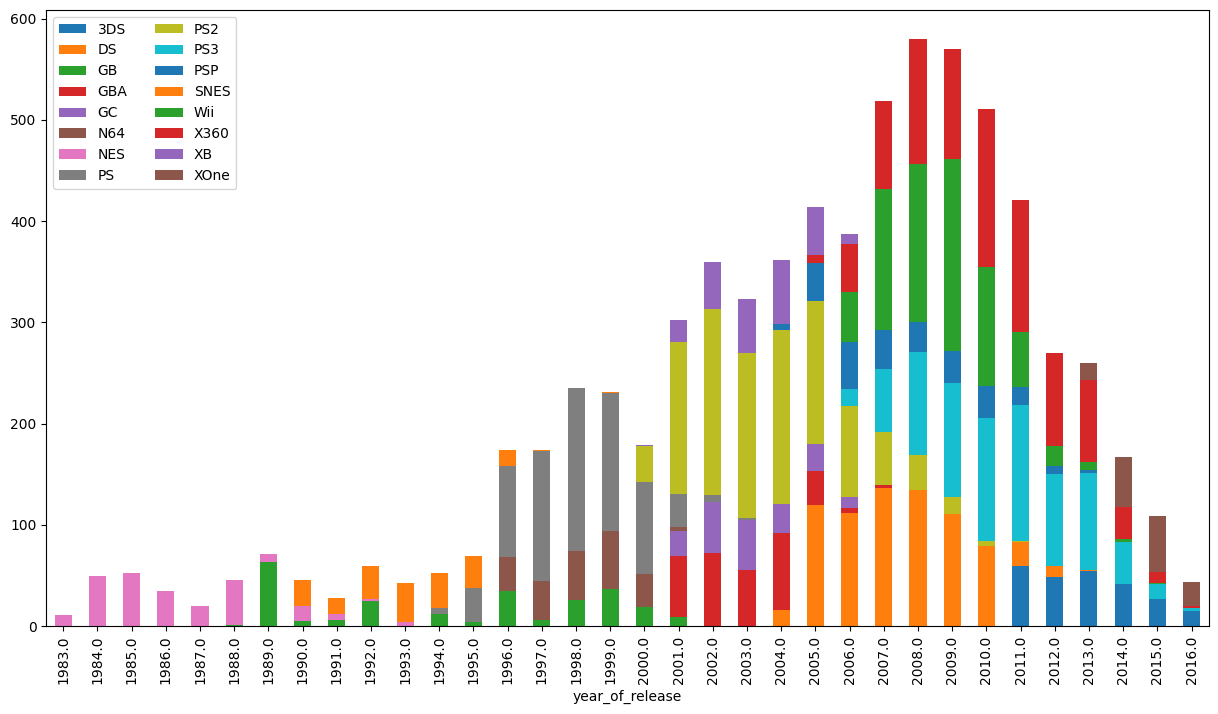

In [74]:
# Breaking it down by platform, only including top and middle tier games (too much noise with all consoles)

top_mid_df = df.query('platform in @top_platforms or platform in @mid_platforms') 

platform_time_series = top_mid_df.groupby(['platform','year_of_release'])['total_sales'].sum()
ax = platform_time_series.unstack(level='platform').plot(kind='bar',figsize=[15,8],stacked=True)
ax.legend(loc='upper left',ncol=2)

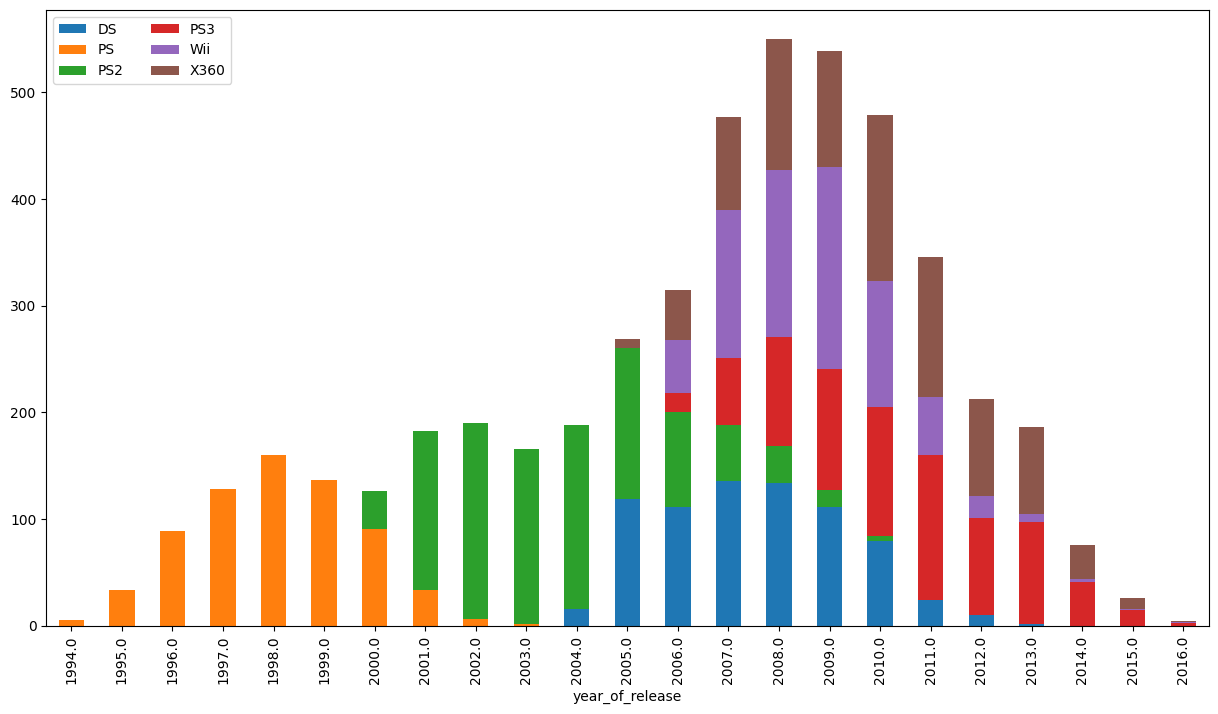

In [75]:
# Looking at just the top
platform_time_series = top_df.groupby(['platform','year_of_release'])['total_sales'].sum()
ax = platform_time_series.unstack(level='platform').plot(kind='bar',figsize=[15,8], stacked=True)
ax.legend(loc='upper left',ncol=2)

<Axes: xlabel='year_of_release'>

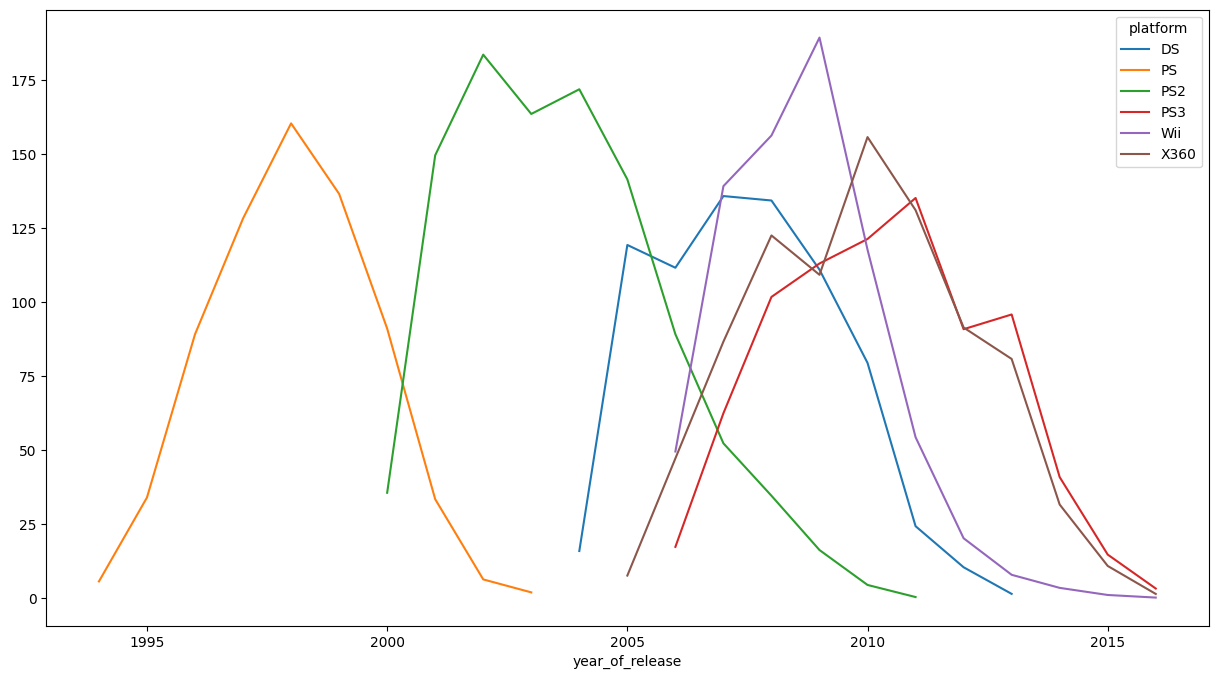

In [41]:
# Visualizing it a different way: 
#     Looks like most successful consoles have around 5 years duration 
#     PC is different since it has many iterations plus other uses 
#     Hard to see clearly in this chart, create tables below with precise values 

# platform_time_series.unstack(level='year_of_release').T.plot(kind='line',figsize=[15,8])
platform_time_series.unstack(level='platform').plot(kind='line',figsize=[15,8])

**Looking at platforms that have completed their lifecycles**

In [77]:
# Create a list of defunct platforms

defunct = table[
    (table['max'] < 2016) 
][['platform','lifecycle']]

print('Average Lifecycle: ', defunct['lifecycle'].mean())
defunct

Average Lifecycle:  6.136363636363637


platform  lifecycle
0       PS2       11.0
4        DS        9.0
5        PS        9.0
6       GBA        7.0
8       PSP       11.0
9        XB        8.0
10       GB       13.0
11      NES       11.0
14      N64        6.0
15     SNES        9.0
16       GC        6.0
18     2600        9.0
21      SAT        5.0
22      GEN        4.0
23       DC       10.0
24      SCD        1.0
25       NG        3.0
26       WS        2.0
27     TG16        0.0
28      3DO        1.0
29       GG        0.0
30     PCFX        0.0

In [43]:
# Create a list of defunct platforms - top platforms
# Average lifecycle is close to 10 years

top_defunct = table[
    (table['max'] < 2016) 
    & (table['platform'].isin(top_platforms))
][['platform','lifecycle']]

print('Average Lifecycle: ', top_defunct['lifecycle'].mean())
top_defunct

Average Lifecycle:  9.666666666666666


platform  lifecycle
0      PS2       11.0
4       DS        9.0
5       PS        9.0

In [44]:
# Create a list of defunct platforms - middle platforms
# Average lifecycle is close to 9 years

mid_defunct = table[
    (table['max'] < 2016) 
    & (table['platform'].isin(mid_platforms))
][['platform','lifecycle']]

print('Average Lifecycle: ', mid_defunct['lifecycle'].mean())
mid_defunct

Average Lifecycle:  8.875


platform  lifecycle
6       GBA        7.0
8       PSP       11.0
9        XB        8.0
10       GB       13.0
11      NES       11.0
14      N64        6.0
15     SNES        9.0
16       GC        6.0

In [45]:
# The average defunct console has a 6 year lifecycle, and the best performing one had 13

table.query('platform != "PC" and max != 2016').describe()

min          max        count  total_sales  avg_sales   
count    22.000000    22.000000    22.000000    22.000000  22.000000  \
mean   1994.727273  2000.863636   451.727273   208.584091   0.565643   
std       6.119304     7.291844   661.610530   283.048350   0.691825   
min    1980.000000  1989.000000     1.000000     0.030000   0.030000   
25%    1992.250000  1995.000000     7.500000     1.532500   0.198258   
50%    1994.500000  2000.000000   107.000000   144.910000   0.331119   
75%    1999.750000  2007.000000   737.750000   248.580000   0.653571   
max    2004.000000  2015.000000  2127.000000  1062.330000   2.549072   

       lifecycle  
count  22.000000  
mean    6.136364  
std     4.189505  
min     0.000000  
25%     2.250000  
50%     6.500000  
75%     9.000000  
max    13.000000

**Looking at distribution of sales**

In [81]:
# Average lifecycle of middle-top consoles is 9-10 years, and max lifecycle for a successful console (GB) is 13
#     We can take data from 2000 onwards and disregard all platforms released before then 
#     We can also disregard consoles not in the top_platforms or middle_platforms 
# We can look at all games with total_sales over $10 million 

# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

# Looks like game sales have a heavy right skew, most will not sell much with a select few creating most of the sales

fig = px.box(top_mid_df.query('platform in @post_2000'),
             x='platform',
             y='total_sales',
             hover_data='name',
             notched=True
            )
fig.show()

In [80]:
# Box plots don't tell much since there's so much right tail skew, can't see the averages 

fig = px.box(top_mid_df.query('platform in @post_2000'),
             x='genre',
             y='total_sales',
             hover_data='name',
             notched=True
            )
fig.show()

<Axes: ylabel='Frequency'>

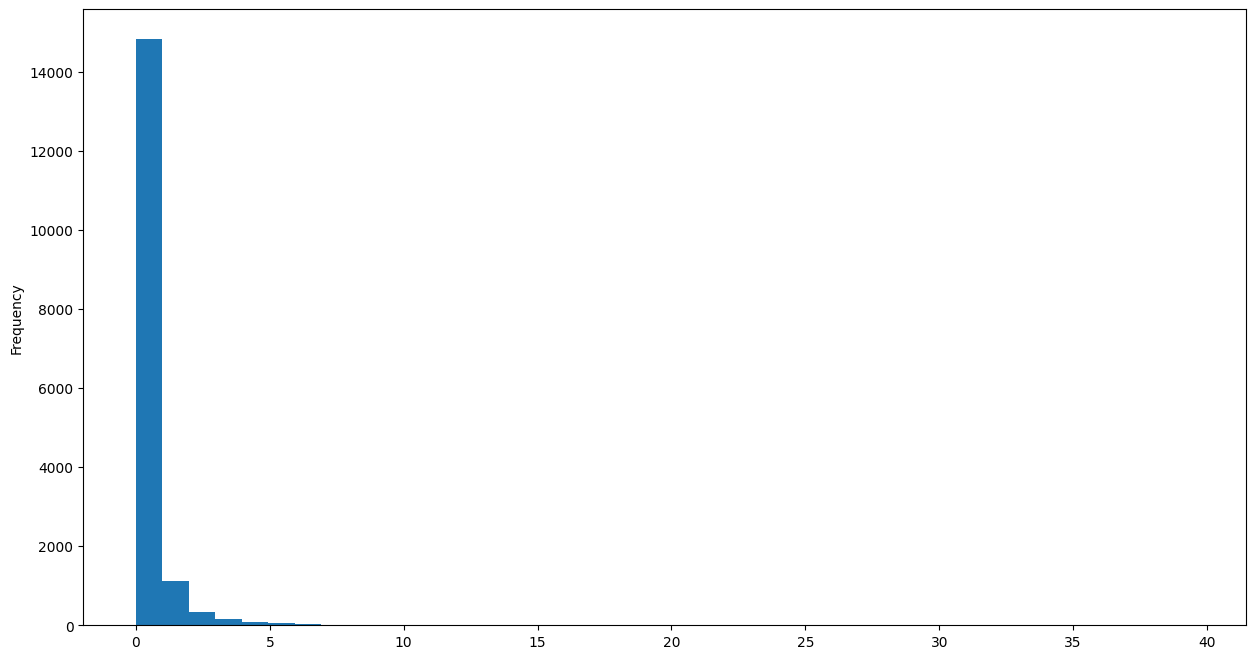

In [82]:
df['total_sales'].plot(kind='hist', bins=40, figsize=[15,8])

<Axes: xlabel='genre'>

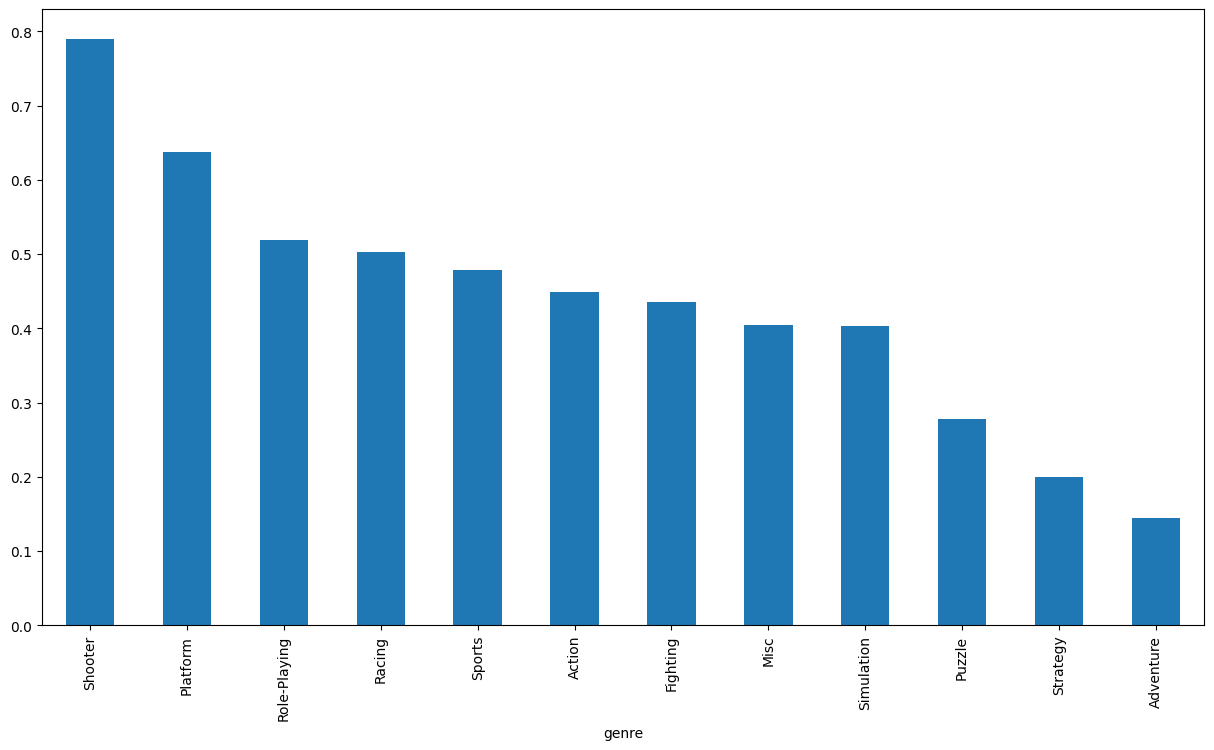

In [83]:
genre_sales = post_2000_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=[15,8])

<Axes: xlabel='platform'>

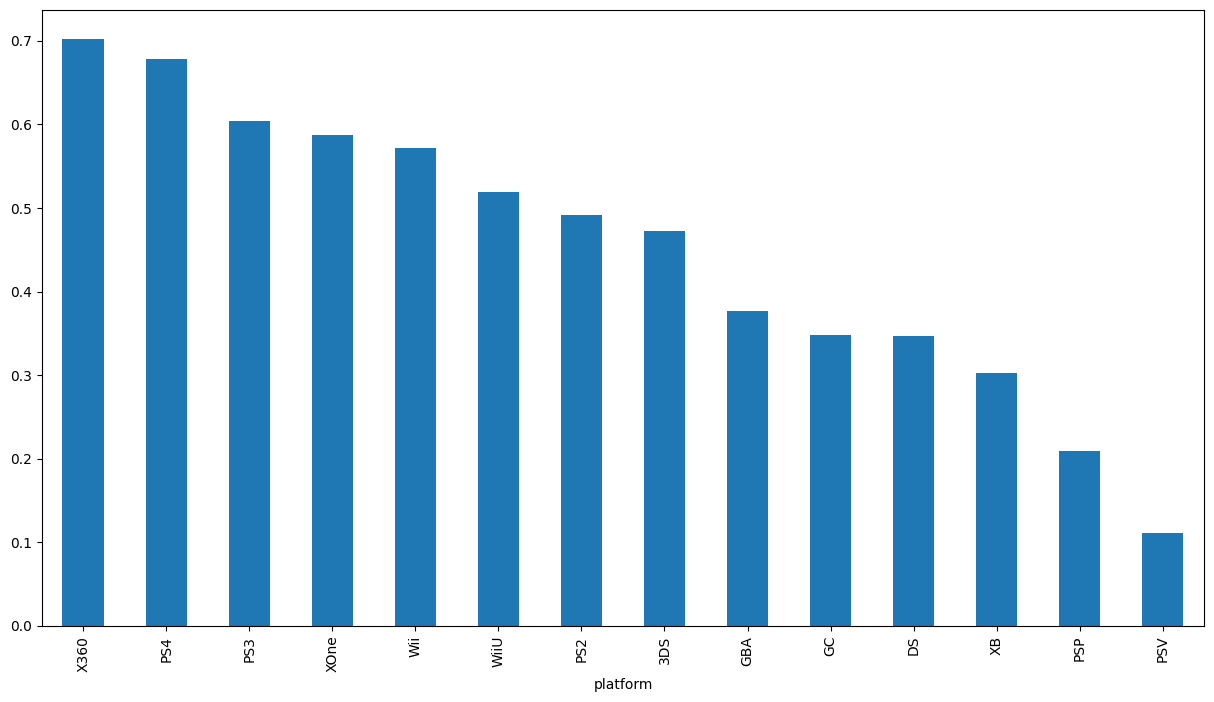

In [84]:
platform_sales = post_2000_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
platform_sales.plot(kind='bar', figsize=[15,8])

<Axes: xlabel='rating'>

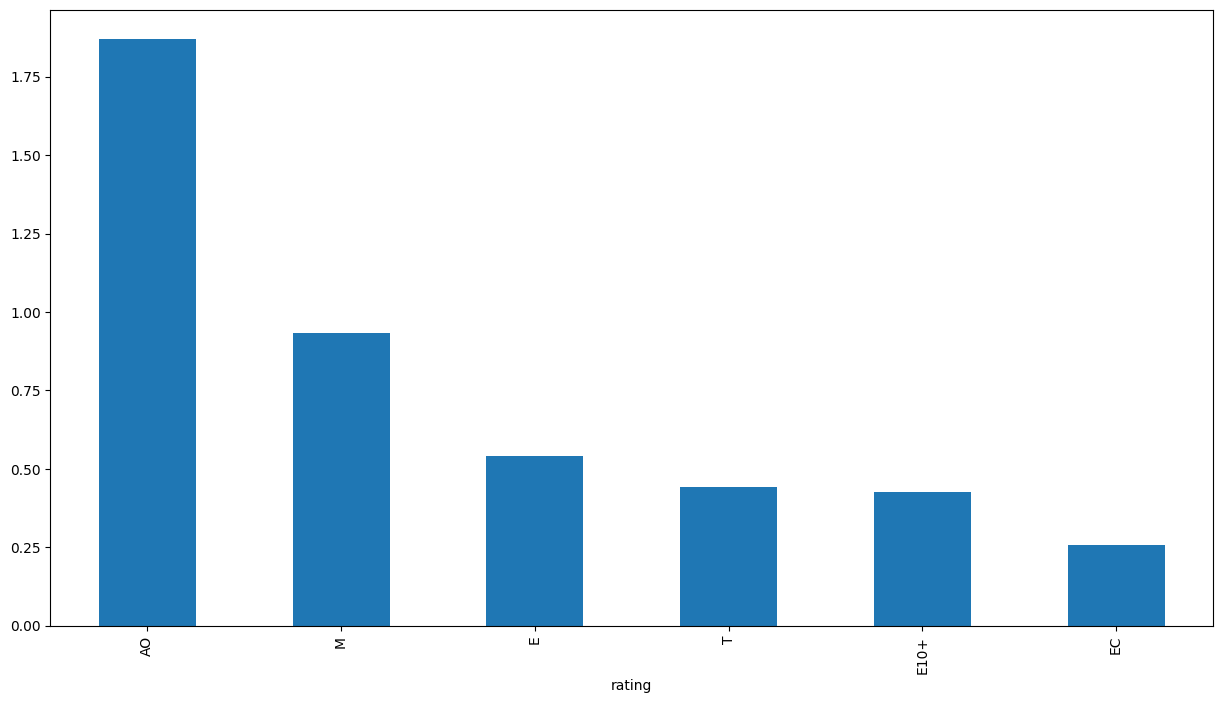

In [85]:
# Seems like more mature games have higher sales? 
rating_sales = post_2000_df.groupby('rating')['total_sales'].mean().sort_values(ascending=False)
rating_sales.plot(kind='bar', figsize=[15,8])

**Looking at user/critic score impact**

In [86]:
# Looking at average rating by all platforms

post_2000_df.groupby('platform')[['critic_score', 'user_score']].agg(['mean', 'count']).sort_values(by=('critic_score','mean'), ascending=False)

critic_score       user_score      
                 mean count       mean count
platform                                    
XOne        73.325444   169  65.214286   182
PS4         72.091270   252  67.482490   257
PSV         70.791667   120  73.363636   143
WiiU        70.733333    90  69.040000   100
PS3         70.382927   820  67.265678   877
XB          69.859310   725  75.005119   586
GC          69.488839   448  75.975410   366
PS2         68.727273  1298  76.268332  1241
X360        68.616812   916  66.835404   966
PSP         67.424242   462  72.282660   421
GBA         67.372146   438  76.768627   255
3DS         67.101190   168  68.316092   174
DS          63.761506   717  70.251938   516
Wii         62.801370   584  67.404293   559

In [87]:
# Looking at average rating by genre

post_2000_df.groupby('genre')[['critic_score', 'user_score']].agg(['mean', 'count']).sort_values(by=('critic_score','mean'), ascending=False)

critic_score       user_score      
                     mean count       mean count
genre                                           
Sports          71.628444  1125  69.822519  1048
Role-Playing    71.254428   621  76.028986   621
Strategy        69.775148   169  72.722222   162
Shooter         69.125628   796  70.401809   774
Fighting        69.069767   387  72.978723   376
Platform        67.600000   470  72.596010   401
Racing          67.158850   661  70.246046   569
Puzzle          67.041284   218  71.260504   119
Simulation      66.708812   261  72.254167   240
Misc            66.470703   512  68.021028   428
Action          65.988338  1715  70.468807  1651
Adventure       64.444853   272  70.610236   254

In [95]:
# Looking at average score by genre and platform
pd.pivot_table(post_2000_df, 
               values='avg_score', 
               index='platform',
               columns='genre', 
               aggfunc=np.mean
              ).sort_values(by=['Shooter'], ascending=False)

genre        Action  Adventure   Fighting       Misc   Platform     Puzzle   
platform                                                                     
PSV       70.081081  74.650000  73.222222  78.500000  76.750000  71.500000  \
PSP       68.519737  68.076923  70.366667  68.023810  73.175000  70.000000   
XB        70.299180  71.750000  69.333333  67.166667  73.576923  37.000000   
GC        72.398551  67.807692  73.041667  68.470588  70.000000  71.833333   
3DS       64.589286  69.500000  68.857143  70.450000  71.888889  69.250000   
PS2       71.793878  66.850000  74.878378  70.675439  70.978873  73.666667   
XOne      69.186275  79.800000  63.500000  71.625000  65.125000        NaN   
PS4       70.726190  75.642857  72.272727  65.875000  65.727273  86.000000   
DS        62.831169  66.193548  66.678571  65.855263  73.514286  71.105769   
GBA       69.451923  70.722222  71.346154  65.250000  75.350000  79.142857   
X360      68.234310  62.312500  69.187500  66.968254  66.309524  60.166667   
WiiU      70.576923  48.000000  69.166667  67.208333  75.966667  74.166667   
PS3       69.351695  68.600000  72.947368  69.616279  67.521739  78.250000   
Wii       65.535433  65.136364  68.865385  65.260563  69.027778  72.357143   

genre        Racing  Role-Playing    Shooter  Simulation     Sports   Strategy  
platform                                                                        
PSV       64.200000     74.390625  73.500000         NaN  73.833333        NaN  
PSP       73.410256     71.442857  73.066667   69.375000  71.442623  67.035714  
XB        70.723684     78.411765  72.372807   73.809524  79.852000  76.230769  
GC        71.318182     76.978261  72.325000   79.500000  78.728571  79.285714  
3DS       62.600000     74.423077  72.000000   69.944444  67.500000  66.500000  
PS2       72.274436     74.904167  71.792969   76.467391  76.027228  73.564103  
XOne      71.535714     78.000000  71.758065   58.000000  63.596774  72.500000  
PS4       69.800000     74.166667  70.985294   75.750000  63.304878  66.375000  
DS        64.184211     73.056180  70.462963   64.689189  70.522727  70.392857  
GBA       70.904762     80.258065  70.307692   78.687500  76.421053  86.750000  
X360      69.189189     71.189655  68.905063   66.633333  68.454545  70.825000  
WiiU      89.500000     79.000000  67.800000   52.000000  62.750000  87.000000  
PS3       68.661538     71.391026  67.774590   64.722222  69.376068  68.833333  
Wii       58.550000     71.942308  67.416667   69.518519  67.532895  66.166667

**Create scatterplots to examine correlations**

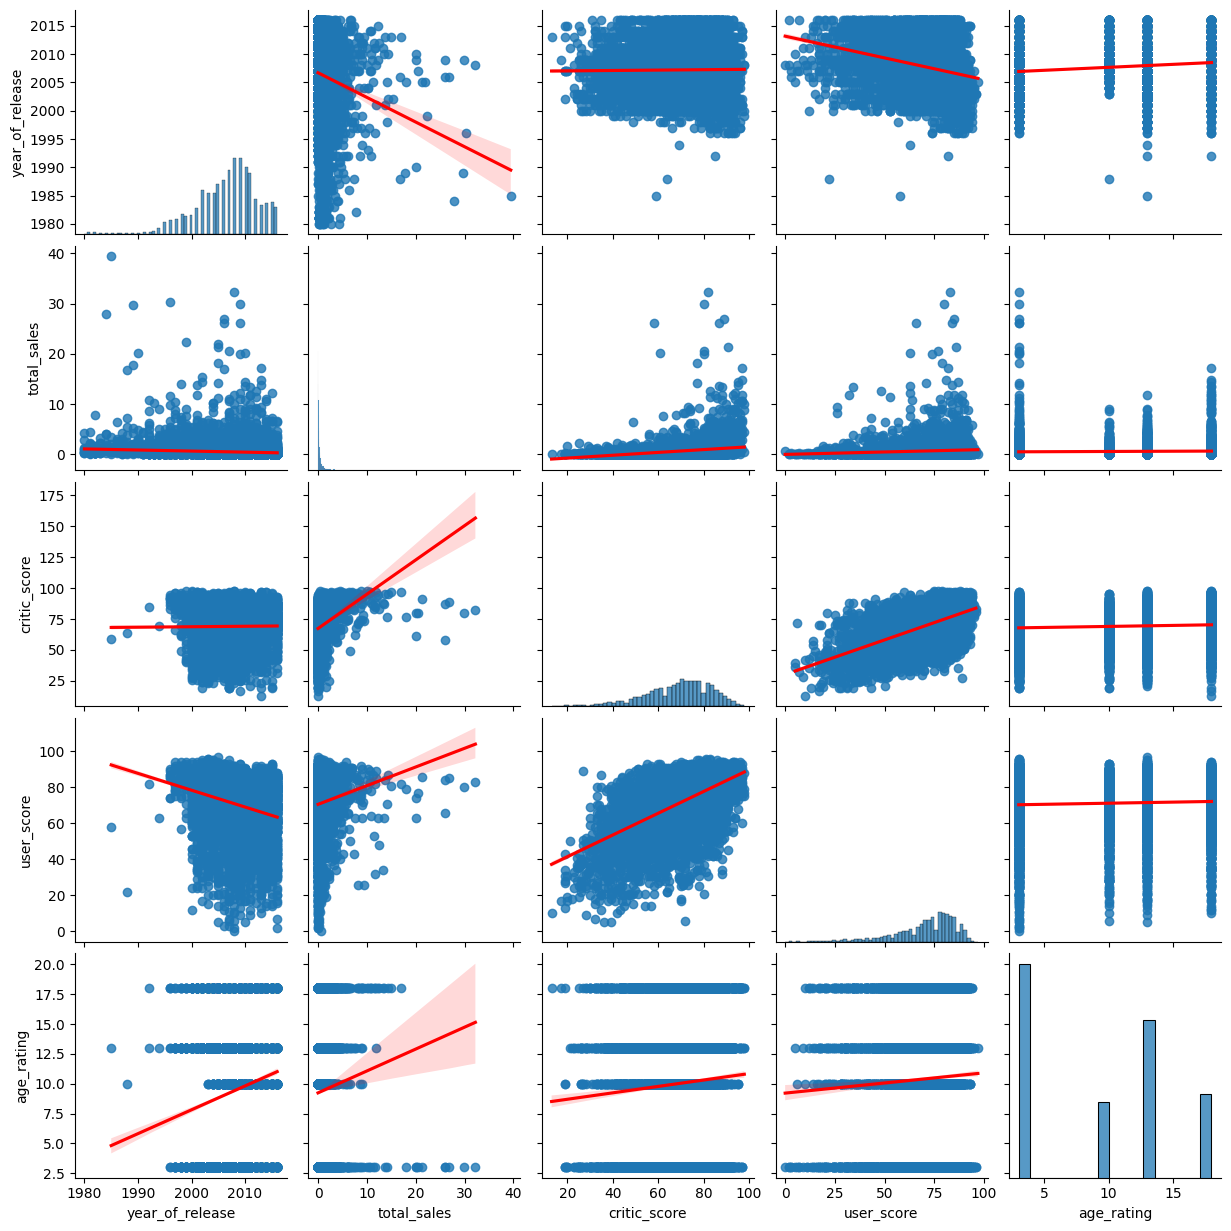

In [103]:
# Plotting the aggregate numeric columns to look for relationships 
#     As expected, user score and critic score both show positive relationships with total_sales

sns.pairplot(df[['year_of_release','total_sales','critic_score','user_score','age_rating']], 
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}}
            )

plt.show()

In [104]:
# Getting the precise correlation between these variables
#     Raw dataset doesn't show strong correlations between score and sales 
#     However there's a lot of NaNs, so let's drop those - still not a strong correlation 
#     Let's only look at games in the post_2000 console group - correlations are still roughly the same 
# No relation between year of release and sales 
# User scores tend to get worse over time
# some correlation between critic score and total sales
# very small correlation between user score and total sales 
# decent correlation between user and critic scores 

df[df['platform'].isin(post_2000)][['year_of_release','total_sales','critic_score','user_score','age_rating']].dropna(how='any').corr()

year_of_release  total_sales  critic_score  user_score   
year_of_release         1.000000     0.040545      0.008710   -0.225856  \
total_sales             0.040545     1.000000      0.285372    0.096119   
critic_score            0.008710     0.285372      1.000000    0.591404   
user_score             -0.225856     0.096119      0.591404    1.000000   
age_rating              0.167283    -0.007850     -0.005567    0.026510   

                 age_rating  
year_of_release    0.167283  
total_sales       -0.007850  
critic_score      -0.005567  
user_score         0.026510  
age_rating         1.000000

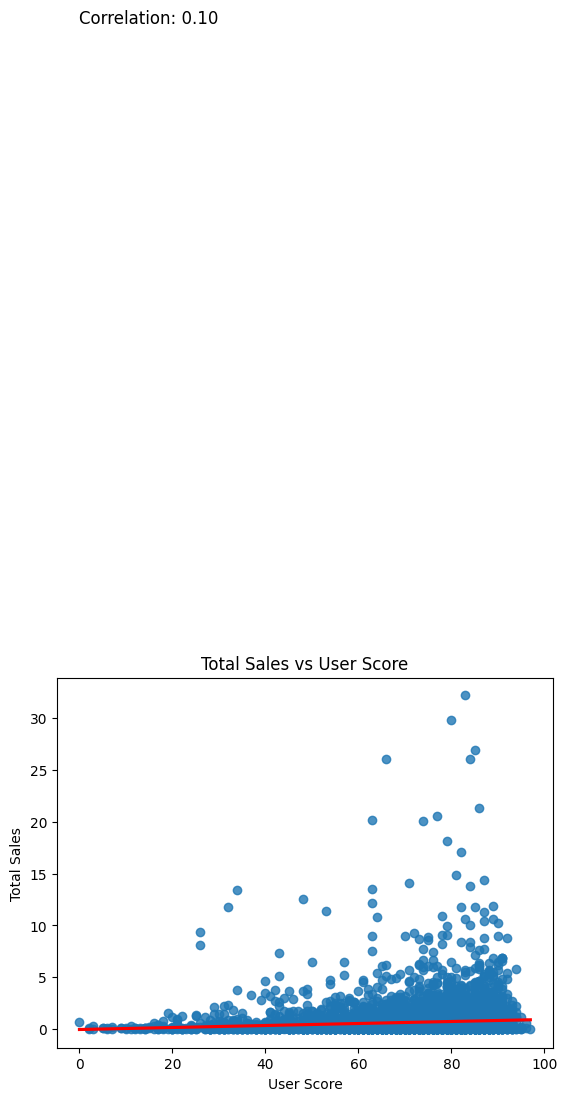

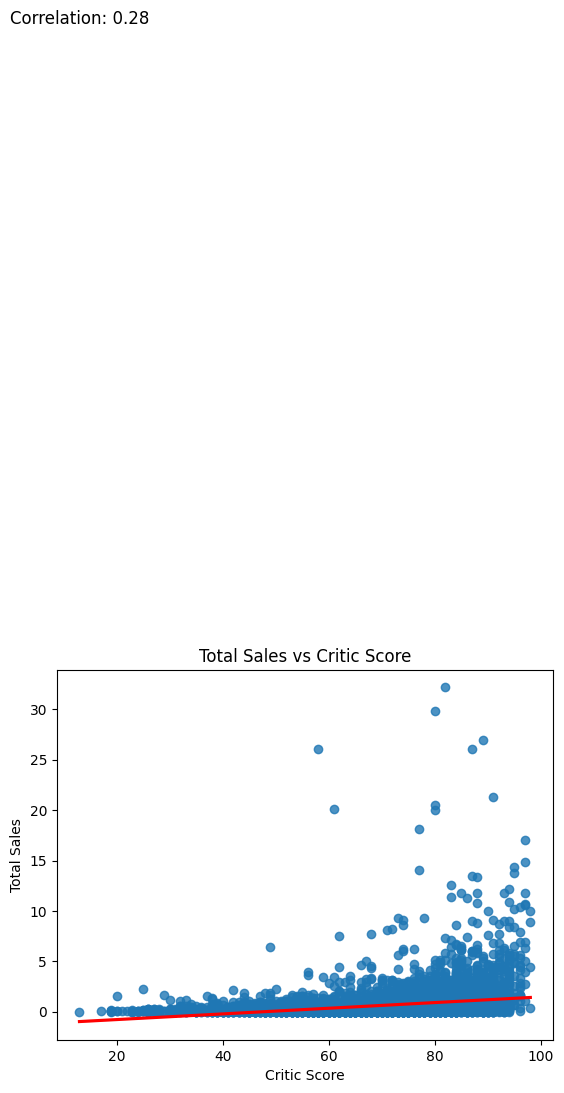

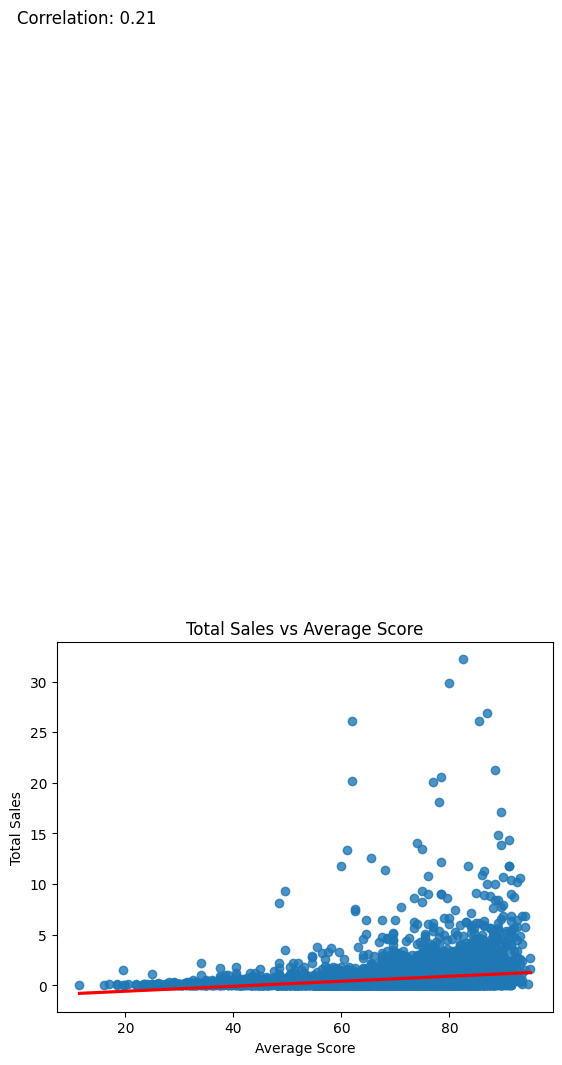

In [57]:
# Look at scatterplot of user_score and critic_score relative to sales, without filling in NaNs first 
# Can also average critic_score and user_score to get a combined score 

scores = ['user_score', 'critic_score', 'avg_score']
score_dict = {
    'user_score':'User Score', 
    'critic_score':'Critic Score', 
    'avg_score':'Average Score'
}

for score in scores:
    sns.regplot(x=score, y='total_sales', data=df, line_kws={'color': 'red'}),
    plt.title('Total Sales vs {}'.format(score_dict[score])),
    plt.xlabel('{}'.format(score_dict[score])),
    plt.ylabel('Total Sales'),
    corr = df['total_sales'].corr(df[score])
    plt.text(df['total_sales'].min(), df[score].max(), f"Correlation: {corr:.2f}", fontsize=12)
    plt.show()

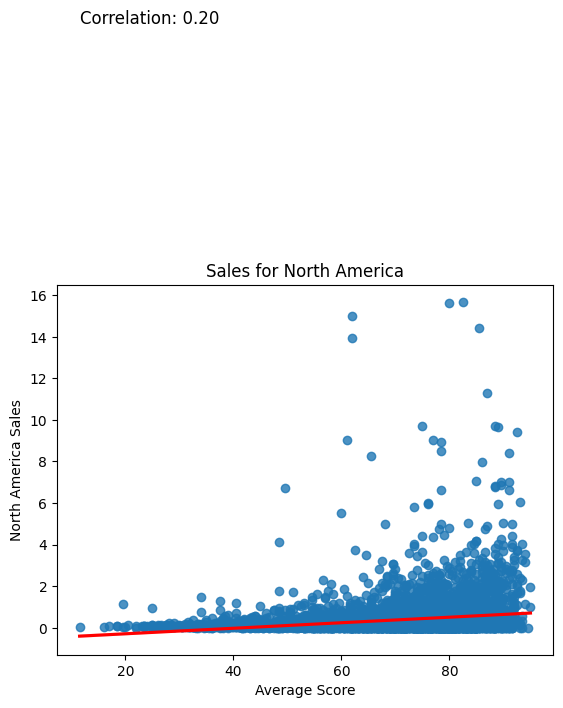

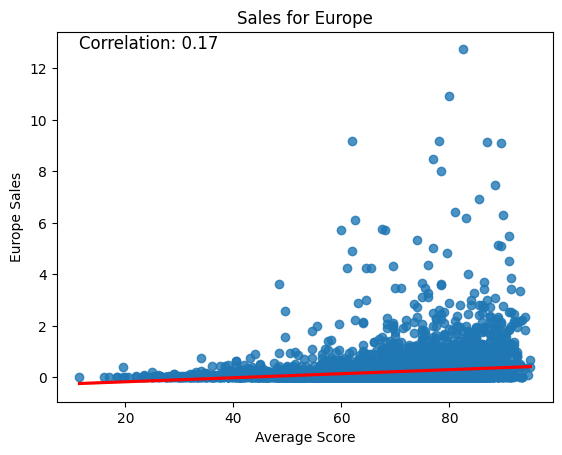

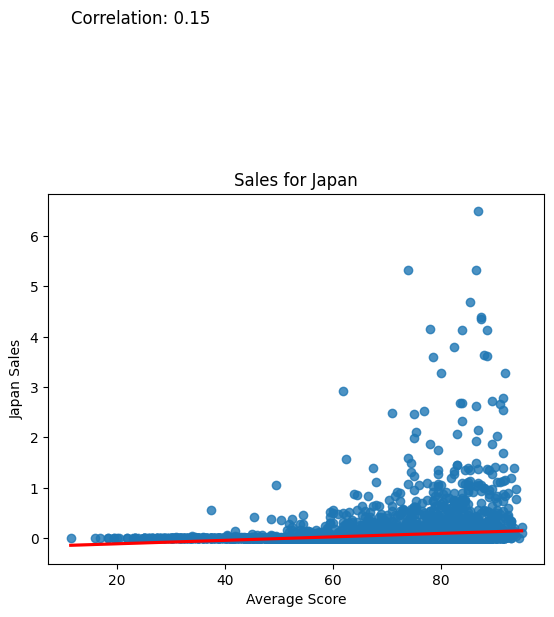

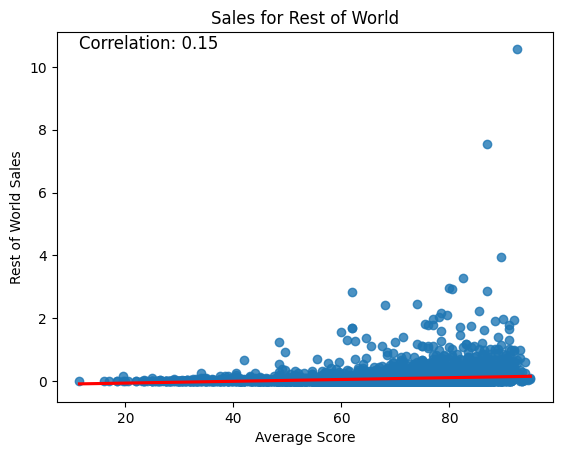

In [58]:
# Use a loop to create scatters for each region 

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_dict = {
    'na_sales':'North America',
    'eu_sales':'Europe',
    'jp_sales':'Japan',
    'other_sales':'Rest of World'
}

for region in regions:
    sns.regplot(x='avg_score', y=region, data=df, line_kws={'color': 'red'}),
    plt.title('Sales for {}'.format(region_dict[region])),
    plt.xlabel('Average Score'),
    plt.ylabel('{} Sales'.format(region_dict[region])),
    corr = df['avg_score'].corr(df[region])
    plt.text(df['avg_score'].min(), df[region].max(), f"Correlation: {corr:.2f}", fontsize=12)
    plt.show()

**Deep diving into PS4:**
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
- Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

<Axes: title={'center': 'Critic Score and Total Sales for PS4 Games'}, xlabel='Critic Score', ylabel='Total Sales'>

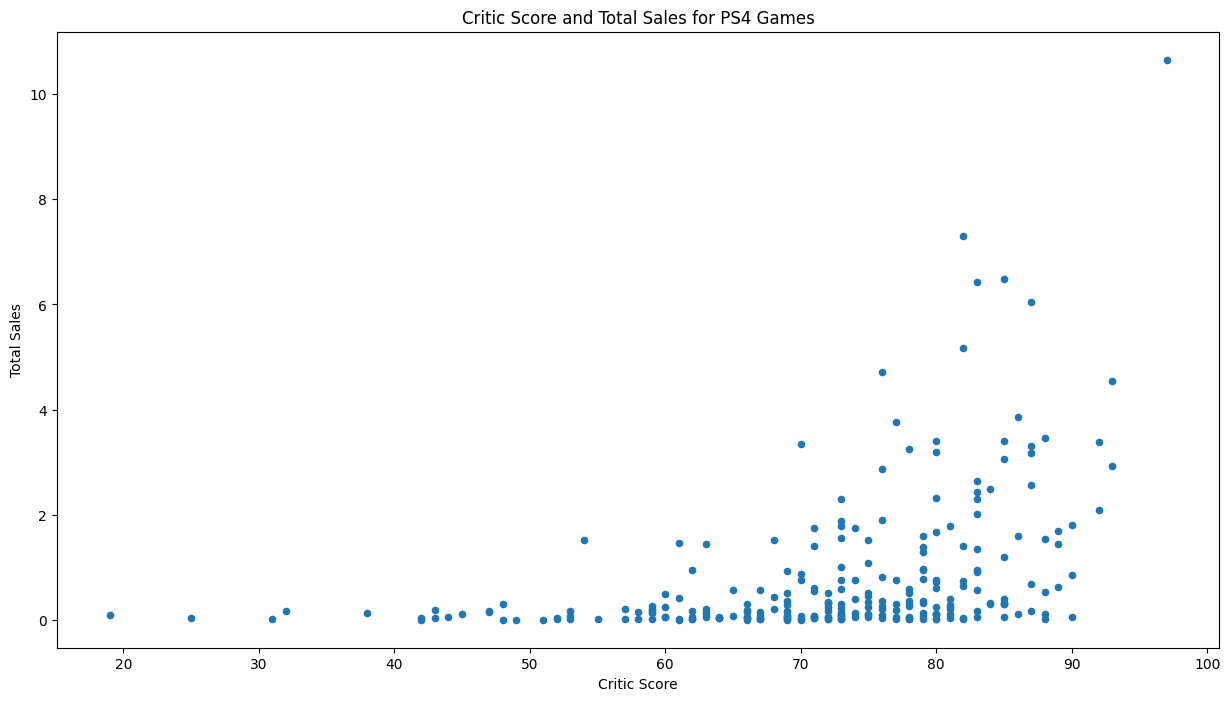

In [59]:
PS4 = df.query("platform == 'PS4'")

PS4.plot(kind='scatter',
         x='critic_score',
         y='total_sales',
         xlabel='Critic Score',
         ylabel='Total Sales',
         title='Critic Score and Total Sales for PS4 Games',
         figsize=[15,8]
        )

# sns.regplot(x='avg_score', y=region, data=df, line_kws={'color': 'red'}),
#     plt.title('Sales for {}'.format(region_dict[region])),
#     plt.xlabel('Average Score'),
#     plt.ylabel('{} Sales'.format(region_dict[region])),
#     corr = df['avg_score'].corr(df[region])
#     plt.text(df['avg_score'].min(), df[region].max(), f"Correlation: {corr:.2f}", fontsize=12)
#     plt.show()

<Axes: title={'center': 'User Score and Total Sales for PS4 Games'}, xlabel='User Score', ylabel='Total Sales'>

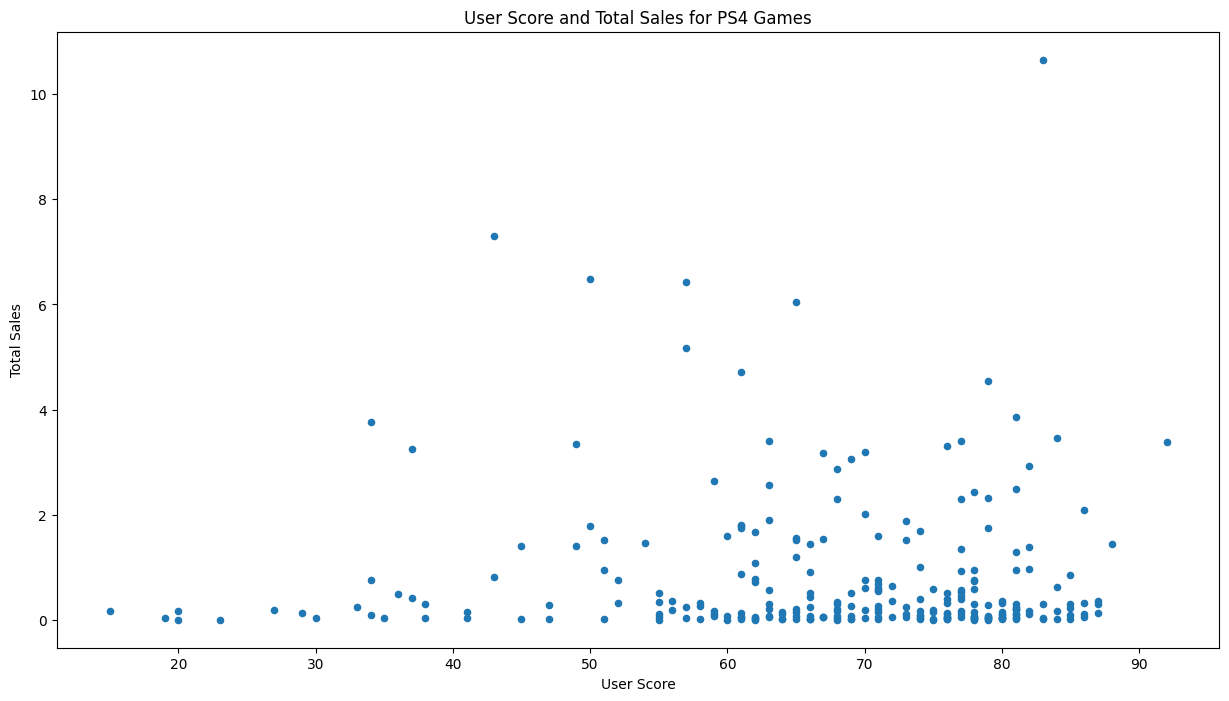

In [60]:
PS4.plot(kind='scatter',
         x='user_score',
         y='total_sales',
         xlabel='User Score',
         ylabel='Total Sales',
         title='User Score and Total Sales for PS4 Games',
         figsize=[15,8]
        )

In [61]:
PS4['critic_score'].corr(PS4['total_sales'])

0.40588677465201317

In [62]:
PS4['user_score'].corr(PS4['total_sales'])

-0.03126053686666919

## Creating regional user profile

## Hypothesis testing
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.
    - Set the alpha threshold value yourself.
- Explain:
    - How you formulated the null and alternative hypotheses
    - What significance level you chose to test the hypotheses, and why

## Conclusion